# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
sns.set(style='whitegrid')

df = pd.read_csv("cleaned_aviation_data.csv", low_memory=False)

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
small_planes = df[df['Total.Onboard'] < 20]
large_planes = df[df['Total.Onboard'] >= 20]

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

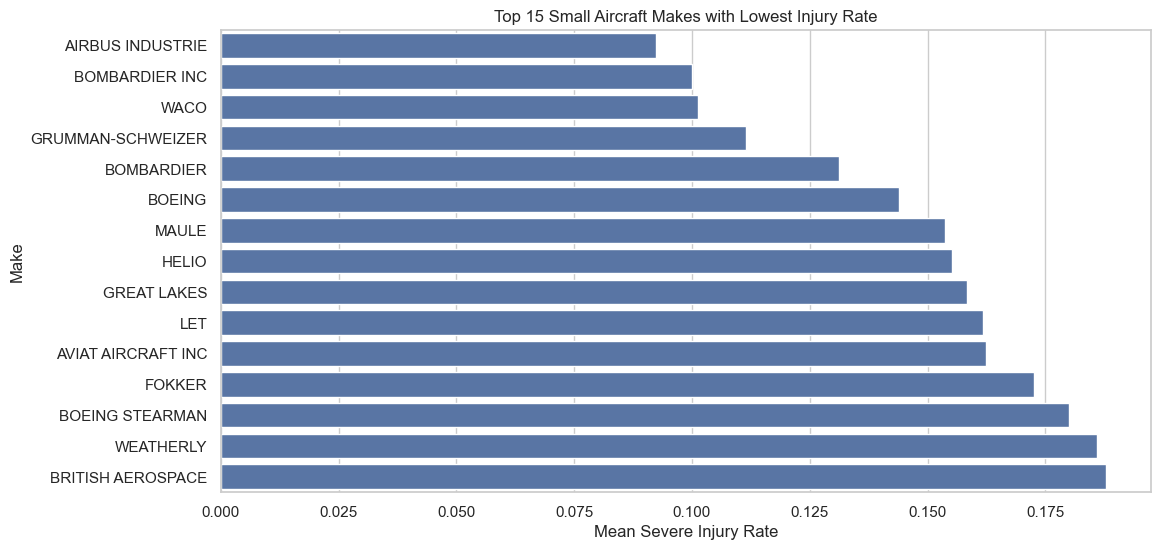

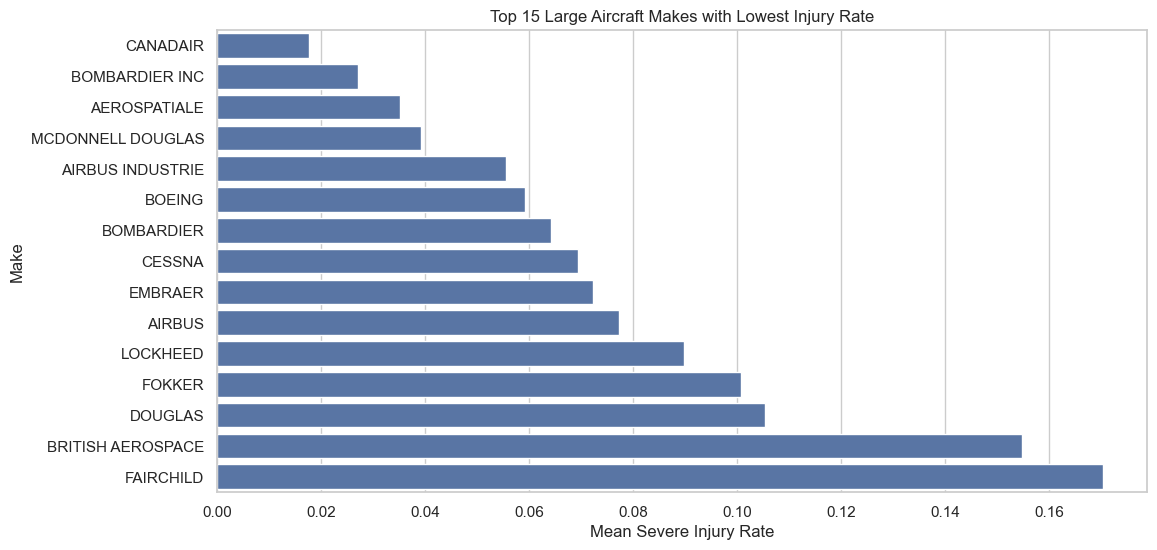

In [4]:
small_makes = small_planes.groupby('Make').filter(lambda x: len(x) >= 10)
small_makes_grouped = small_makes.groupby('Make')['Severe.Injury.Rate'].mean().sort_values().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=small_makes_grouped.values, y=small_makes_grouped.index)
plt.title('Top 15 Small Aircraft Makes with Lowest Injury Rate')
plt.xlabel('Mean Severe Injury Rate')
plt.ylabel('Make')
plt.show()

large_makes = large_planes.groupby('Make').filter(lambda x: len(x) >= 10)
large_makes_grouped = large_makes.groupby('Make')['Severe.Injury.Rate'].mean().sort_values().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=large_makes_grouped.values, y=large_makes_grouped.index)
plt.title('Top 15 Large Aircraft Makes with Lowest Injury Rate')
plt.xlabel('Mean Severe Injury Rate')
plt.ylabel('Make')
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

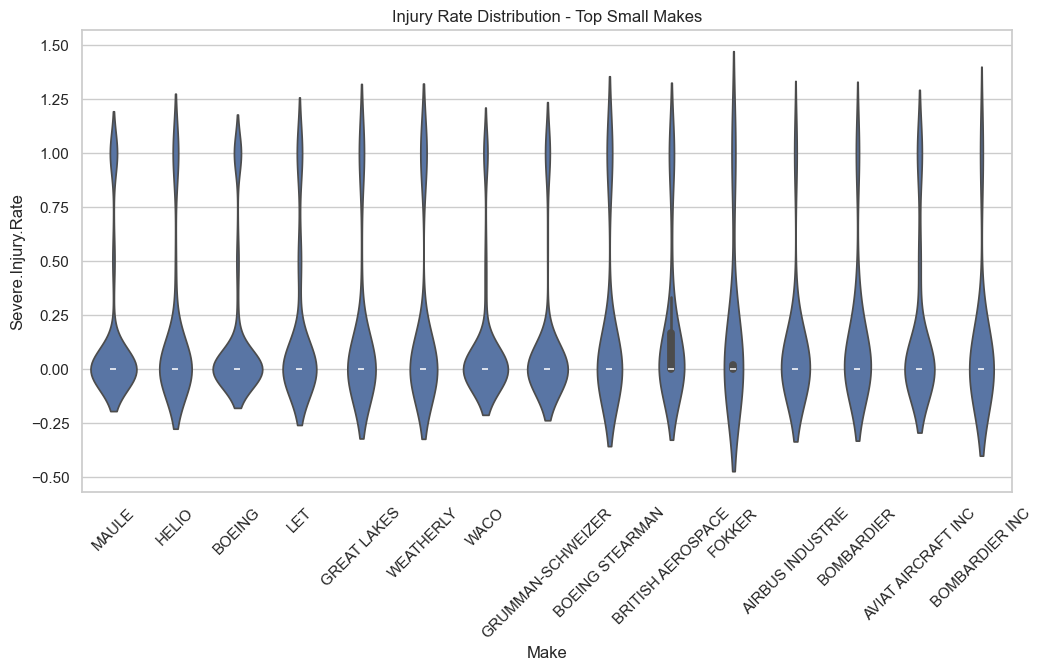

In [5]:
top_small_makes = small_makes_grouped.index.tolist()
subset = small_planes[small_planes['Make'].isin(top_small_makes)]
plt.figure(figsize=(12,6))
sns.violinplot(x='Make', y='Severe.Injury.Rate', data=subset)
plt.xticks(rotation=45)
plt.title('Injury Rate Distribution - Top Small Makes')
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

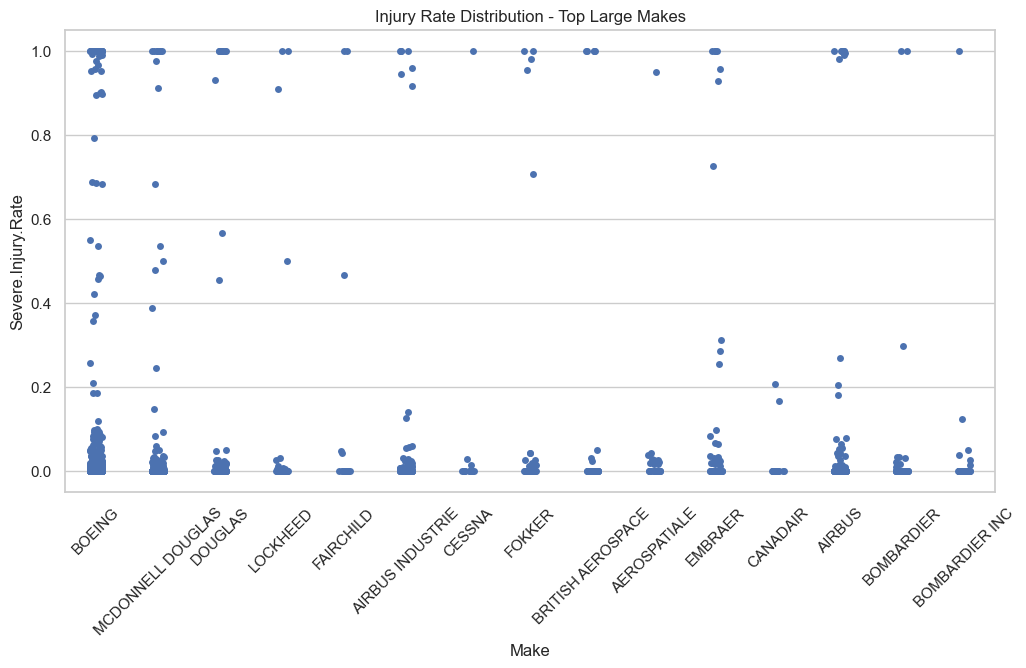

In [6]:
top_large_makes = large_makes_grouped.index.tolist()
subset = large_planes[large_planes['Make'].isin(top_large_makes)]
plt.figure(figsize=(12,6))
sns.stripplot(x='Make', y='Severe.Injury.Rate', data=subset, jitter=True)
plt.xticks(rotation=45)
plt.title('Injury Rate Distribution - Top Large Makes')
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

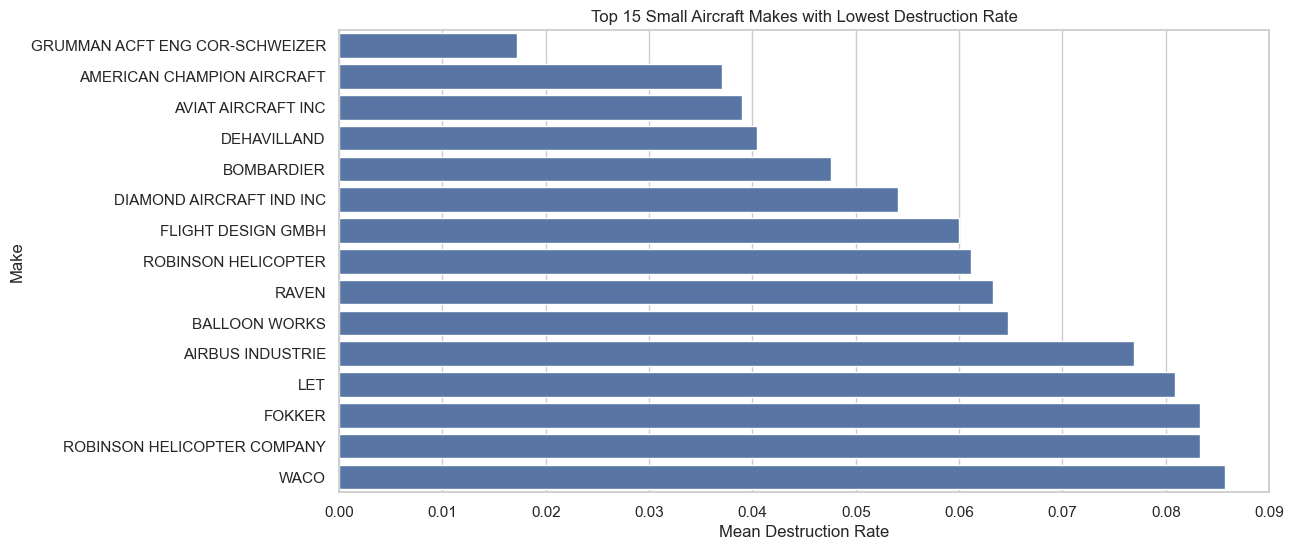

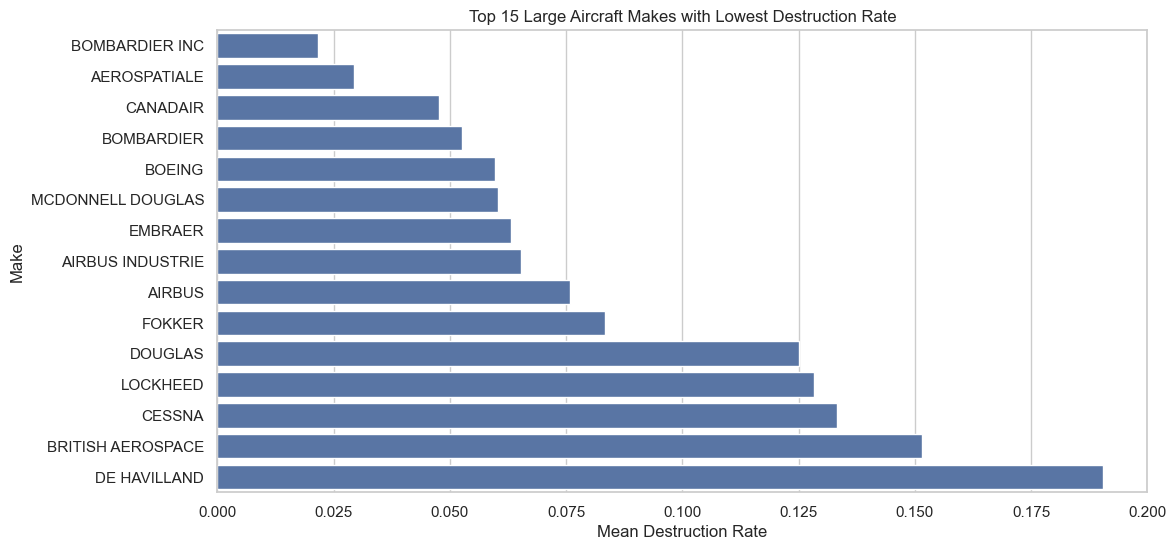

In [7]:
destruction_small = small_makes.groupby('Make')['Destroyed'].mean().sort_values().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=destruction_small.values, y=destruction_small.index)
plt.title('Top 15 Small Aircraft Makes with Lowest Destruction Rate')
plt.xlabel('Mean Destruction Rate')
plt.ylabel('Make')
plt.show()

destruction_large = large_makes.groupby('Make')['Destroyed'].mean().sort_values().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=destruction_large.values, y=destruction_large.index)
plt.title('Top 15 Large Aircraft Makes with Lowest Destruction Rate')
plt.xlabel('Mean Destruction Rate')
plt.ylabel('Make')
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

Among large aircraft, Bombardier Inc and Aerospatiale appear to be safer choices based on both injury and destruction metrics. Based on low injury and destruction rates, makes like Grumman and American Champion Aircraft may be considered safest among small aircraft.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

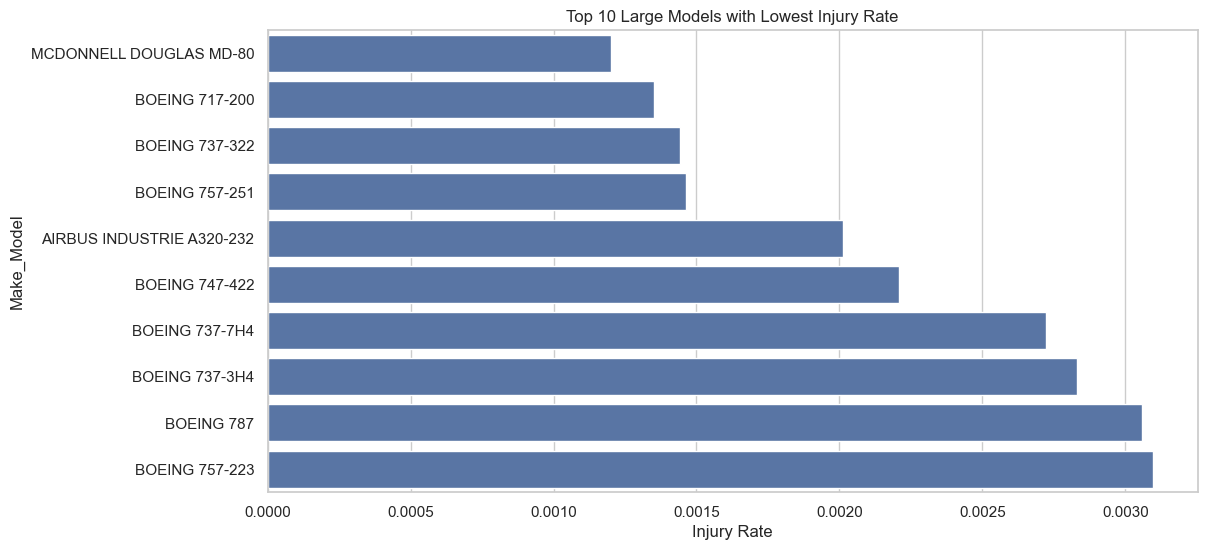

In [8]:
avg_large = large_planes.groupby('Make_Model').filter(lambda x: len(x) >= 10)
avg_large_grouped = avg_large.groupby('Make_Model')['Severe.Injury.Rate'].mean().sort_values().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_large_grouped.values, y=avg_large_grouped.index)
plt.title('Top 10 Large Models with Lowest Injury Rate')
plt.xlabel('Injury Rate')
plt.ylabel('Make_Model')
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

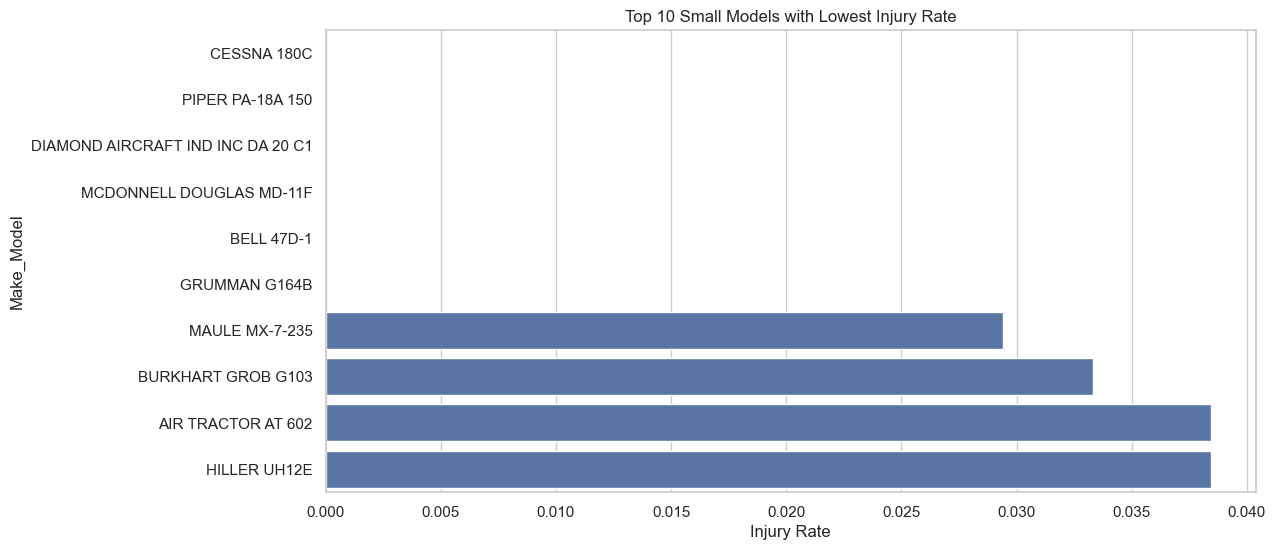

In [9]:
avg_small = small_planes.groupby('Make_Model').filter(lambda x: len(x) >= 10)
avg_small_grouped = avg_small.groupby('Make_Model')['Severe.Injury.Rate'].mean().sort_values().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_small_grouped.values, y=avg_small_grouped.index,)
plt.title('Top 10 Small Models with Lowest Injury Rate')
plt.xlabel('Injury Rate')
plt.ylabel('Make_Model')
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

Suprisingly the data above shows that large airplane models have a more consistent safety profile. Large models also have lower average injury fractions overall. Small airplanes have greater variation in the serious/fatal injury fraction across different small aircraft makes. Plane size plays a major role large planes are generally safer on average. The indiviual make and models still matter significantly in both small and large categories.The safest aircraft are those with both low injury and destruction rates, and those are often concentrated among well-established manufacturers with strong safety records. 

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

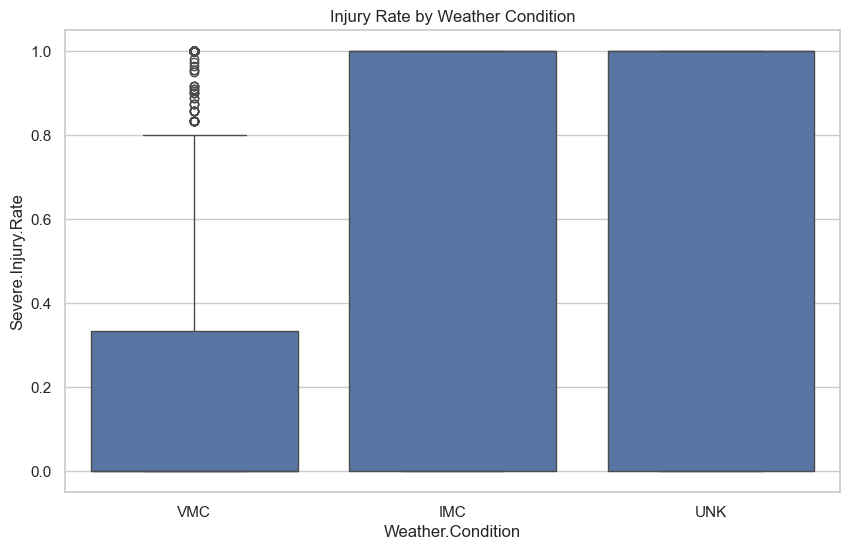

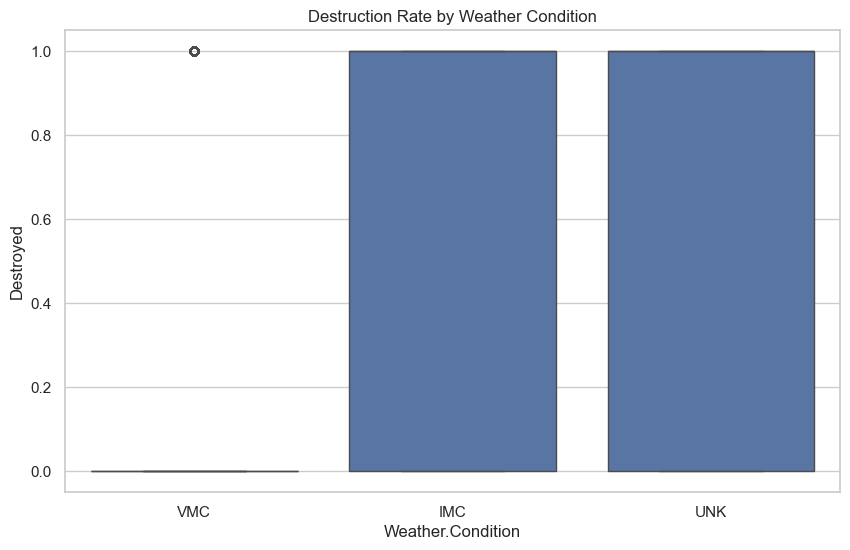

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Weather.Condition', y='Severe.Injury.Rate')
plt.title('Injury Rate by Weather Condition')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Weather.Condition', y='Destroyed')
plt.title('Destruction Rate by Weather Condition')
plt.show()

 I chose weather conditions and number of engines for my examples.

The engine type may be a proxy for aircraft size, complexity, or mission type, which affects accident severity. Aircraft with multiple engines may require additional safety measures and pilot support systems, especially in adverse conditions. The weather appears to have a huge effect on the safety of aircraft because the VMC (good visibility) measurement is significantly lower based on the chart above. 